# Explore experiences result on NCBI

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import random
random.seed(12)

import sys
sys.path.insert(1, '../../utils_paper/')
from resultsUtils import build_jsons, json2pandas
from visuClass import visualizer, yaset_pred

%load_ext autoreload
%autoreload 2

# Build jsons

In [2]:
# fetch results and store in different paths
path2jsons = '../jsons/'

In [3]:
build_jsons('../results/ncbi/', path2jsons, show_path=False)

 94%|█████████▍| 34/36 [01:04<00:03,  1.89s/it]

100%|██████████| 36/36 [01:06<00:00,  1.84s/it]

Collected 35 xperiences in ../results/ncbi/ and stored all in ../jsons/


# Analysis

In [3]:
#!rm ../../jsons/.ipynb_checkpoints -rf

In [8]:
df = json2pandas(path2jsons, trajs = False, fixed_iter=None, verbose=False)

##  Pubmed embeddings

(30, 17)


,best_iter,char_embedding_size,char_hidden_layer_size,cpu_cores,dropout_rate,f1,feature_data,hidden_layer_size,nb_iter,nb_train_tokens,opt_decay_use,patience,precision,recall,time_elapsed,word_emb_dim,word_emb_train
0,20,24,32,30,0.5,78.80,False,64,30,128557.0,False,10,78.85,78.75,453.0,25,True
0,18,24,32,30,0.5,79.83,False,64,28,128557.0,False,10,79.04,80.62,62.0,25,True
0,15,24,32,30,0.5,79.33,False,64,25,128557.0,False,10,78.55,80.12,56.0,25,True
0,11,24,32,30,0.5,78.75,False,64,21,128557.0,False,10,78.75,78.75,47.0,25,True
0,19,24,32,30,0.5,79.24,False,64,29,128557.0,False,10,78.13,80.38,65.0,25,True


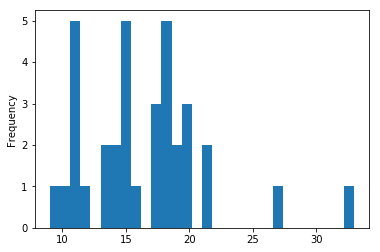

In [9]:
df['best_iter'].plot(kind = 'hist', bins = 30)
df = df.iloc[:30]
print(df.shape)
df.head(5)

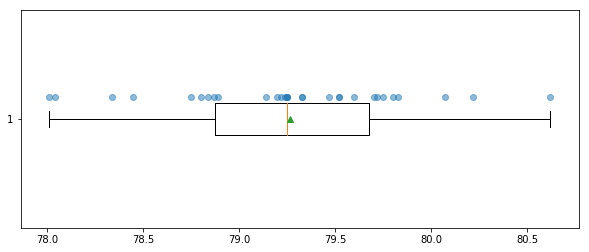

average:  79.26733333333333
sd:  0.5916921121288958
max diff:  2.6099999999999994
max diff perc:  0.03345724907063196


In [10]:
plt.figure(figsize=(10,4))
plt.boxplot(df['f1'], vert=False, showmeans=True)
plt.scatter(df['f1'], np.repeat(1.1, len(df['f1'])), alpha = 0.5)
plt.show()
print('average: ', np.mean(df['f1']))
print('sd: ', np.std(df['f1']))
print('max diff: ', np.max(df['f1']) - np.min(df['f1']))
print('max diff perc: ', (np.max(df['f1']) - np.min(df['f1']))/np.min(df['f1']))

## Evaluation on the test set
Take long time, prefer to exploit the preprocessed results in /results/ncbi_apply

In [11]:
path2test = '../data/ncbi_test.conll'
path2models = '../results/ncbi/'
path2outputs = '../results/ncbi_apply/'

for model in os.listdir(path2models):
    path2model = path2models+model+'/'
    #yaset_pred(path2model=path2model, pathgold=path2test, path2save=path2outputs)

In [12]:
from tqdm import tqdm
path2results = '../results/ncbi_apply/'
path2golds = '../data/ncbi_test.conll'
test_scores = []
for folder in tqdm(os.listdir(path2results)):
    path2pred = path2results + folder+'/'+'output-model-001.conll'
    if not os.path.isfile(path2pred):
        print(path2results+folder, 'is uncomplete experiment')
    else:
        join_visu = visualizer(path2golds, path2pred, verbose = False)
        test_scores.append(join_visu.score_predictions(average = 'micro', punct_ignore = True))


  3%|▎         | 1/36 [00:00<00:11,  2.94it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


  6%|▌         | 2/36 [00:00<00:09,  3.61it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 11%|█         | 4/36 [00:01<00:09,  3.49it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 14%|█▍        | 5/36 [00:01<00:08,  3.49it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 17%|█▋        | 6/36 [00:01<00:08,  3.67it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 22%|██▏       | 8/36 [00:02<00:07,  3.94it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 25%|██▌       | 9/36 [00:02<00:06,  3.94it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 31%|███       | 11/36 [00:02<00:06,  4.09it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 36%|███▌      | 13/36 [00:03<00:05,  4.20it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 42%|████▏     | 15/36 [00:03<00:04,  4.23it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 47%|████▋     | 17/36 [00:03<00:04,  4.31it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 53%|█████▎    | 19/36 [00:04<00:03,  4.32it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 58%|█████▊    | 21/36 [00:04<00:03,  4.37it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 64%|██████▍   | 23/36 [00:05<00:02,  4.42it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 69%|██████▉   | 25/36 [00:05<00:02,  4.42it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 75%|███████▌  | 27/36 [00:06<00:02,  4.46it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 81%|████████  | 29/36 [00:06<00:01,  4.45it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 86%|████████▌ | 31/36 [00:06<00:01,  4.49it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 92%|█████████▏| 33/36 [00:07<00:00,  4.51it/s]

Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


 94%|█████████▍| 34/36 [00:07<00:00,  4.53it/s]

../results/ncbi_apply/yaset-apply-20180706-151745 is uncomplete experiment
Predicted labels: ['Modifier', 'SpecificDisease', 'DiseaseClass', 'CompositeMention']


100%|██████████| 36/36 [00:07<00:00,  4.64it/s]


In [13]:
test_df = pd.DataFrame(test_scores, columns=['precision', 'recall', 'f1', 'count'])
#test_df.pivot(index=0, columns=1, values=2)
test_df.drop(['count'], axis = 1, inplace = True)
test_df = test_df.iloc[:30]
test_df.shape

(30, 3)

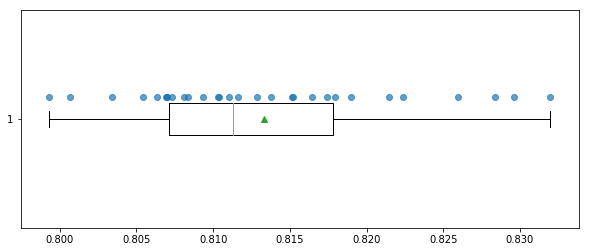

average:  0.8133358379603328
sd:  0.00826956966354127
max diff:  0.03268594213385745
max diff perc:  4.0893638090660644


In [14]:
plt.figure(figsize=(10,4))
plt.boxplot(test_df['f1'], vert=False, showmeans=True)
plt.scatter(test_df['f1'], np.repeat(1.1, len(test_df['f1'])), alpha = 0.7)
plt.show()
print('average: ', np.mean(test_df['f1']))
print('sd: ', np.std(test_df['f1']))
print('max diff: ', np.max(test_df['f1']) - np.min(test_df['f1']))
print('max diff perc: ', 100*(np.max(test_df['f1']) - np.min(test_df['f1']))/np.min(test_df['f1']))

## Mean iter time on train

In [5]:
df.cpu_cores.value_counts()

30    35
Name: cpu_cores, dtype: int64

In [15]:
nb_train = np.mean(df.nb_train_tokens )
print(nb_train)
nb_sents = 7279
df.mean_iter_time_s
valid_time = pd.DataFrame([t for t in df.mean_iter_time_s if t < 150])
print(len(valid_time))
sent_sec = nb_sents / valid_time
tok_sec = nb_train / valid_time
print('nb_sents /s {}'.format(np.mean(sent_sec)))
print('nb_toks /s {}'.format(np.mean(tok_sec)))

128557.0
18
nb_sents /s 0    58.977958
dtype: float64
nb_toks /s 0    1041.630633
dtype: float64


In [14]:
df.mean_iter_time_s

0    857.0
0    122.0
0    121.0
0    122.0
0    123.0
0    121.0
0    123.0
0    123.0
0    124.0
0    123.0
0    123.0
0    123.0
0    122.0
0    122.0
0    122.0
0    123.0
0    246.0
0    246.0
0    242.0
0    247.0
0    123.0
0    168.0
0    246.0
0    127.0
0    136.0
0    243.0
0    246.0
0    162.0
0    168.0
0    245.0
0    166.0
0    180.0
0    247.0
0    196.0
0    172.0
Name: mean_iter_time_s, dtype: float64